
248321.02684283105
19.050729532354545

Coeff of determination:  0.0101735546150963

MSE:  17085086442.576084


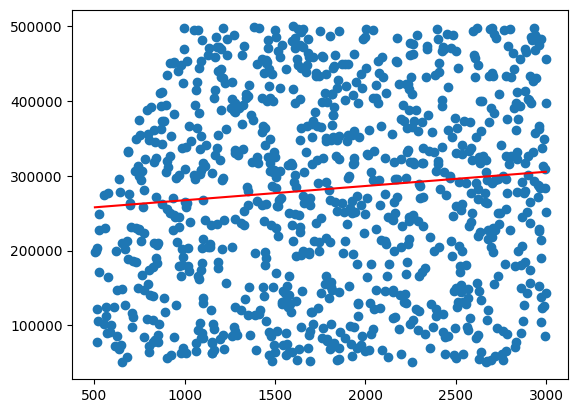

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('"C:\Advay\IIT Mumbai\WIDS\data.csv"')

#Data cleaning, preprocessing
df = df.dropna()
df.drop_duplicates(inplace = True)
x = df[df.columns[0]]
y = df[df.columns[1]]

xbar = np.mean(x)
ybar = np.mean(y)

z = y/x
#removing outliers in x, y using their ratio:
Q1 = z.quantile(0.25)
Q3 = z.quantile(0.75)
IQR = Q3 - Q1
x = x[(z>=Q1 - 1.5*IQR) & (z<=Q3 + 1.5*IQR)]
y = y[(z>=Q1 - 1.5*IQR) & (z<=Q3 + 1.5*IQR)]

#calculatin slope, intercept of linear regression line
nume = 0
deno = 0
for i, j in zip(x, y):
  nume = nume + (i - xbar)*(j - ybar)
  deno = deno + (i - xbar)*(i - xbar)

slope = nume/deno
intercept = ybar - slope*xbar

plt.scatter(x, y)

print()
print(intercept)
print(slope)



x_dash = np.linspace(min(x), max(x), 100)
y_dash = slope*x_dash + intercept


plt.plot(x_dash, y_dash, color = 'red')
plt.show() 

def y_predicted(x):
  return slope*x + intercept

ssf = 0
ssm = 0
for i,j in zip(x,y):
  ssf = ssf + (j - i*slope - intercept)*(j - i*slope - intercept)
  ssm = ssm + (j-ybar)*(j-ybar)

R_sq = (ssm - ssf)/ssm
mse = ssf/len(x)
print()
print('Coeff of determination: ', R_sq)
print()
print("MSE: ", mse)

